# Metadata

In [1]:
import os
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf
from IPython.display import display, Audio

### Dataset

**Standard Placement**

In [2]:
DATA_DIR = '../data/binaural_musdb18/standard/test/'

In [3]:
file_list = [f for f in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, f))]

In [4]:
song = []
source = []
angle = []

for file in file_list:
    with open(os.path.join(DATA_DIR, file, 'metadata.json'), 'rb') as f:
        data = json.load(f)
        for k, v in data.items():
            if v > 90:
                v = v - 360
            song.append(file)
            source.append(k)
            angle.append(v)

In [5]:
standard_angles = pd.DataFrame({'title': song, 'source': source, 'standard_angle': angle})

**Random Placement**

In [6]:
DATA_DIR = '../data/binaural_musdb18/random/test/'

In [7]:
file_list = [f for f in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, f))]

In [8]:
song = []
source = []
angle = []

for file in file_list:
    with open(os.path.join(DATA_DIR, file, 'metadata.json'), 'rb') as f:
        data = json.load(f)
        for k, v in data.items():
            if v > 90:
                v = v - 360
            song.append(file)
            source.append(k)
            angle.append(v)

In [9]:
random_angles = pd.DataFrame({'title': song, 'source': source, 'random_angle': angle})

**Subplots**

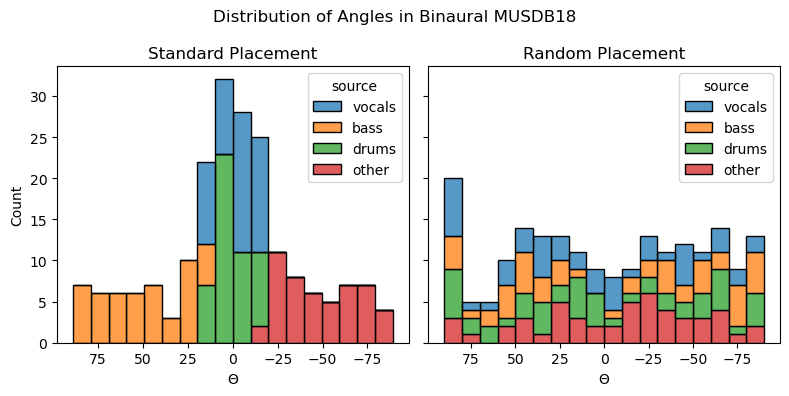

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True, sharey=True)

sns.histplot(x='standard_angle', hue='source', multiple='stack', data=standard_angles, binwidth=10, ax=ax[0])
sns.histplot(x='random_angle', hue='source', multiple='stack', data=random_angles, binwidth=10, ax=ax[1])

t = ['Standard Placement', 'Random Placement']
for i in range(len(ax)):
    ax[i].invert_xaxis()
    ax[i].set(ylabel='Count', xlabel='$\Theta$')
    ax[i].set_title(t[i])

fig.suptitle("Distribution of Angles in Binaural MUSDB18")
plt.savefig('../data/plots/binaural_musdb_angles.pdf', bbox_inches='tight')
plt.show()

### Export Metadata

In [11]:
merged_df = pd.merge(standard_angles, random_angles, how='inner', on=['title', 'source']).sort_values(by=['title', 'source'], ignore_index=True)

In [12]:
merged_df.to_csv('../data/binaural_musdb18/metadata.csv')